In [116]:
"""Part 0: function as an input"""
"Central difference"

import numpy as np

def CD(f, x, dx):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def f1(x):
    
    return x**3

def f2(x):
    
    return x**2

x = 1.0
dx = 1e-8
print(CD(f2, x, dx))


def gaussQuad(f):
    
    x_list = [-np.sqrt(3.0/ 5.0), 0.0, np.sqrt(3.0/ 5.0)]
    w_list = [5.0/9, 8.0/9, 5.0/9]
    
    sum = 0.0
    
    for i in xrange(len(x_list)):
        
        sum += f(x_list[i]) * w_list[i]
        
    return sum

gaussQuad(f2)



1.9999999934


0.66666666666666674

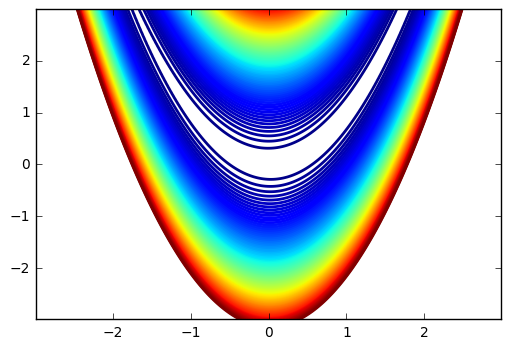

In [35]:
"""Part I: Unconstrained Optimization"""

from scipy.optimize import minimize
import time


import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return (100.0*(x[1]-x[0]**2.0)**2.0 + (1-x[0])**2.0)

# Rosenbrock gradient
def rosen_der(x):

    der = np.zeros(2)

    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[1] = 200*(x[1]-x[0]**2)
    return der

# initial pt for optimization
x0 = np.array([0.0,0.0])


# post process
if (1==1):
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z = np.array(np.zeros((len(y),len(x))))
    for i in xrange(len(x)):
        for j in xrange(len(y)):
            loc_x = x[i]
            loc_y = y[j]

            loc = np.array([loc_x,loc_y])

            Z[j,i] = rosen(loc)

#     im = plt.imshow(Z, interpolation='bilinear', origin='lower',
#                 cmap=cm.viridis, extent=(-3, 3, -3, 3))
    levels = np.arange(0.0, 1000.0, 10.0)
    CS = plt.contour(Z, levels,
                     origin='lower',
                     linewidths=2,
                     extent=(-3, 3, -3, 3))
    plt.show()



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 96
         Gradient evaluations: 24
('optimization time', 0.007328033447265625)


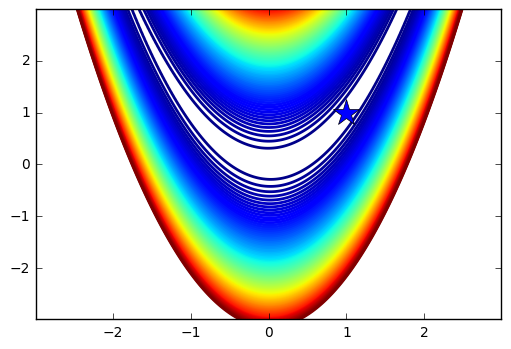

In [36]:
"""Part I: cont'd: other optimizer? We need gradient?"""





# optimize!


time_begin = time.time()

# Nelder-Mead (gradient free) w/o gradient
if (1 == 0):
    res = minimize(rosen, x0, method='Nelder-Mead',options={'disp': True})

# conjugate gradient (CG) w/o gradient
if (1 == 0):
    res = minimize(rosen, x0, method='CG',options={'disp': True})

# conjugate gradient (CG) with gradient
if (1 == 0):
    res = minimize(rosen, x0, method='CG', jac=rosen_der,options={'disp': True})

# BFGS w/o gradient
if (1 == 1):
    res = minimize(rosen, x0, method='BFGS',options={'disp': True})

# BFGS with gradient
if (1 == 0):
    res = minimize(rosen, x0, method='BFGS', jac=rosen_der,options={'disp': True})


time_end = time.time()


print("optimization time", time_end - time_begin)



# competetion time! 

def mccormick(x_vec):
    
    x = x_vec[0]
    y = x_vec[1]
    
    return np.sin(x + y) + (x - y)**2 - 1.5 * x + 2.5 * y + 1.0

def mccormickJac(x_vec):
    
    x = x_vec[0]
    y = x_vec[1]
    
    der = np.zeros(2)
    
    der[0] = np.cos(x + y) + 2 * (x - y) - 1.5
    der[1] = np.cos(x + y) - 2 * (x - y) + 2.5
    
    return der

def mccormickHess(x_vec):
    
    x = x_vec[0]
    y = x_vec[1]
    
    Hessian = np.zeros((2,2))
    
    Hessian[0, 0] = np.sin(x + y) + 2
    Hessian[1, 0] = np.sin(x + y) - 2
    Hessian[0, 1] = Hessian[1, 0]
    Hessian[1, 1] = np.sin(x + y) + 2
    
    return Hessian
    
    

x0 = np.array([0.0,0.0])

res = minimize(mccormick, x0, method='SLSQP',jac=mccormickJac,    options={'disp': True})
print(res.x)





#########################################################

# post process
if (1==1):
    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z = np.array(np.zeros((len(y),len(x))))
    for i in xrange(len(x)):
        for j in xrange(len(y)):
            loc_x = x[i]
            loc_y = y[j]

            loc = np.array([loc_x,loc_y])

            Z[j,i] = rosen(loc)

#     im = plt.imshow(Z, interpolation='bilinear', origin='lower',
#                 cmap=cm.viridis, extent=(-3, 3, -3, 3))
    levels = np.arange(0.0, 1000.0, 10.0)
    CS = plt.contour(Z, levels,
                     origin='lower',
                     linewidths=2,
                     extent=(-3, 3, -3, 3))
    #plt.clabel(CS, inline=10, fontsize=10)
    plt.plot(res.x[0],res.x[1],"*",markersize=20)
    plt.show()
    
    

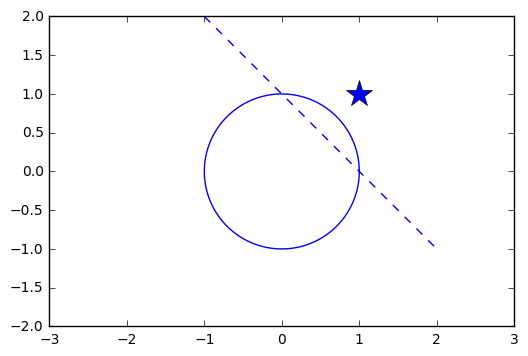

In [2]:
"""Part II: constrained optimization"""
"""How do the constraints look like?"""

# Inequality constraint
theta_array = np.linspace(0, 2.0*np.pi, 1000)

r = 1.0

x_list_ineq = []
y_list_ineq = []

for i in xrange(len(theta_array)):
    
    theta_loc = theta_array[i]
    
    x_loc = r * np.cos(theta_loc)
    y_loc = r * np.sin(theta_loc)
    
    x_list_ineq.append(x_loc)
    y_list_ineq.append(y_loc)

    
x_list_eq = [-1, 2]
y_list_eq = [2, -1]
    

plt.figure()
plt.plot(x_list_ineq, y_list_ineq, 'b-')
plt.plot([1], [1], "*",markersize=20)
plt.plot(x_list_eq, y_list_eq, 'b--')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.axes().set_aspect('equal', 'datalim')
plt.show()




Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.14560701804
            Iterations: 10
            Function evaluations: 15
            Gradient evaluations: 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0400000030739
            Iterations: 15
            Function evaluations: 22
            Gradient evaluations: 15
infinite norm result [ 0.8         0.64000554]


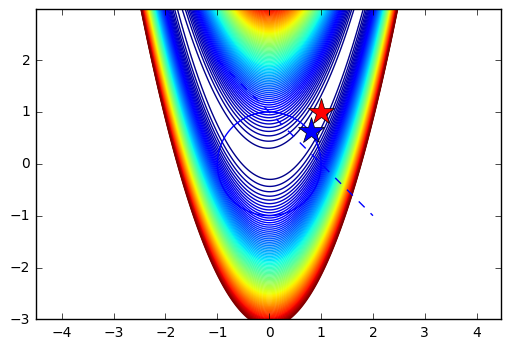

In [115]:
"""Part II: constrained optimization"""
"""Main"""

import numpy as np
from scipy.optimize import minimize
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return (100.0*(x[1]-x[0]**2.0)**2.0 + (1-x[0])**2.0)

# Rosenbrock gradient
def rosen_der(x):

    der = np.zeros(2)

    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[1] = 200*(x[1]-x[0]**2)
    return der

# constraints

    
cons = [{'type': 'ineq',
          'fun' : lambda x: np.array([1-x[0]**2-x[1]**2]),
          'jac' : lambda x: np.array([-x[0]*2.0, -x[1]*2.0])}, 
        {'type': 'eq',
          'fun' : lambda x: np.array([x[0] + x[1]-1.0]),
          'jac' : lambda x: np.array([1.0,1.0])}
         ]

# initial point
x0 = np.array([0.0,0.0])


# optimize!
res = minimize(rosen, x0, jac=rosen_der,constraints=cons, method='SLSQP', options={'disp': True})
post_process_flag = 1


#########################################################

cons2 = [{'type': 'ineq',
          'fun' : lambda x: np.array([0.8 - x[0]]),
          'jac' : lambda x: np.array([-1.0, 0])}, 
        {'type': 'ineq',
          'fun' : lambda x: np.array([0.8 + x[0]]),
          'jac' : lambda x: np.array([1.0, 0])}, 
        {'type': 'ineq',
          'fun' : lambda x: np.array([0.8 - x[1]]),
          'jac' : lambda x: np.array([0, -1.0])}, 
        {'type': 'ineq',
          'fun' : lambda x: np.array([0.8 + x[1]]),
          'jac' : lambda x: np.array([0, 1.0])}, 
         ]

res = minimize(rosen, x0, jac=rosen_der,constraints=cons2, method='SLSQP', options={'disp': True})
print "infinite norm result", res.x

#########################################################



# post process
if (post_process_flag==1):
    # ball constraint
    theta = np.linspace(0,2.0*np.pi,100)
    x_cir = []
    y_cir = []
    for i in xrange(len(theta)):
        x_cir.append(np.cos(theta[i]))
        y_cir.append(np.sin(theta[i]))
    plt.plot(x_cir,y_cir, 'b-')

    # line constraint
    x_list_eq = [-1, 2]
    y_list_eq = [2, -1]
    plt.plot(x_list_eq,y_list_eq, 'b--')

    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z = np.array(np.zeros((len(y),len(x))))
    for i in xrange(len(x)):
        for j in xrange(len(y)):
            loc_x = x[i]
            loc_y = y[j]

            loc = np.array([loc_x,loc_y])

            Z[j,i] = rosen(loc)

    levels = np.arange(0, 1000, 10)
    CS = plt.contour(X, Y, Z,levels)
    #plt.clabel(CS, inline=100, fontsize=10)
    plt.plot(res.x[0],res.x[1],"b*",markersize=20)
    plt.plot([1],[1],"r*",markersize=20)
    plt.axes().set_aspect('equal', 'datalim')
    plt.show()

Iteration limit exceeded    (Exit mode 9)
            Current function value: 4.51341617272
            Iterations: 101
            Function evaluations: 1813
            Gradient evaluations: 101


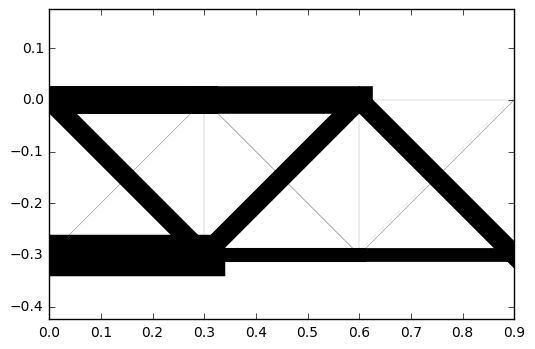

areas [ 2.01334675  1.39592271  0.01846748  2.98716095  0.01        1.9872385
  0.02252627  1.39598693  1.01319813  0.01        0.01        1.40121799
  0.01765501  0.99085639  0.01      ] stress [-9.99848948 -9.99889524  9.98786427  9.99931848 -0.02289094 -9.9987005
 -8.17387588  9.99866711  9.99823937  3.67293454 -9.34680835 -9.99840985
  7.48704339  9.99794925 -9.34680835]


In [102]:
"""Part III. KS aggregation: Truss optimization"""
def get_matrix(areas):
    
    global nodes
    global elements
    global cons
    global E
    
    num_nodes = nodes.shape[0]
    num_elems = elements.shape[0]
    num_cons = cons.shape[0]

    nnn = 2 * num_nodes
    nnz = nnn + 2 * num_cons
    
    K_glo = np.matrix(np.zeros((nnn, nnn)))
    K_glo_aug = np.matrix(np.zeros((nnz, nnz)))
    aug = np.matrix(np.zeros((2 * num_cons, nnn)))
    
    K_loc_aligned = np.matrix(np.zeros((2, 2)))
    K_loc_aligned[0, 0] =  1.0
    K_loc_aligned[1, 0] = -1.0
    K_loc_aligned[0, 1] = -1.0
    K_loc_aligned[1, 1] =  1.0 
    
    index_loc_row = np.matrix(np.zeros((4, 4),dtype=int))
    index_loc_col = np.matrix(np.zeros((4, 4),dtype=int))
    
    index_loc_row[1, :] += 1
    index_loc_row[3, :] += 1
    index_loc_col[:, 1] += 1
    index_loc_col[:, 3] += 1
    
    index_LU_ones = np.matrix(np.zeros((4, 4),dtype=int))
    index_LL_ones = np.matrix(np.zeros((4, 4),dtype=int))
    index_RU_ones = np.matrix(np.zeros((4, 4),dtype=int))
    index_RL_ones = np.matrix(np.zeros((4, 4),dtype=int))
    
    index_LU_ones[0:2,0:2] += 1
    index_LL_ones[2:4,0:2] += 1
    index_RU_ones[0:2,2:4] += 1
    index_RL_ones[2:4,2:4] += 1
        
    
    
    for i in xrange(num_elems):
        
        area_loc = areas[i]
        
        node_ind_1 = elements[i, 0]
        node_ind_2 = elements[i, 1]
        
        xy1 = np.transpose(nodes[node_ind_1, :])
        xy2 = np.transpose(nodes[node_ind_2, :])
        
        dx = xy2 - xy1
        l_loc = np.sqrt(np.sum(np.multiply(dx,dx)))
        
        cos_xy = dx / l_loc
        
        T = np.matrix(np.zeros((2, 4)))
        T[0, 0:2] = np.transpose(cos_xy)
        T[1, 2:4] = np.transpose(cos_xy)
        
        K_loc = (E * area_loc / l_loc) * np.transpose(T).dot(K_loc_aligned).dot(T)
        
        
        index_glo_row = np.matrix(np.zeros((4, 4),dtype=int))
        index_glo_row += index_loc_row
        index_glo_row += index_LU_ones * node_ind_1 * 2
        index_glo_row += index_RU_ones * node_ind_1 * 2
        index_glo_row += index_LL_ones * node_ind_2 * 2
        index_glo_row += index_RL_ones * node_ind_2 * 2

        index_glo_col = np.matrix(np.zeros((4, 4),dtype=int))
        index_glo_col += index_loc_col
        index_glo_col += index_LU_ones * node_ind_1 * 2
        index_glo_col += index_RU_ones * node_ind_2 * 2
        index_glo_col += index_LL_ones * node_ind_1 * 2
        index_glo_col += index_RL_ones * node_ind_2 * 2
        
        
        for ii in xrange(4):
            for jj in xrange(4):
                
                ind_row = index_glo_row[ii, jj]
                ind_col = index_glo_col[ii, jj]
                
                K_glo[ind_row, ind_col] += K_loc[ii, jj]
                
    "constraints"
    for i in xrange(num_cons):
        
        ind_con = cons[i]
        
        aug[2*i,   2*ind_con] = 1.0
        aug[2*i+1, 2*ind_con+1] = 1.0
        
    
    K_glo_aug[0:nnn, 0:nnn] += K_glo
    K_glo_aug[nnn:,  0:nnn] += aug
    K_glo_aug[0:nnn,  nnn:] += np.transpose(aug)
    
    
    return K_glo_aug
    

    
def get_stress(areas):
    
    global nodes
    global elements
    global cons
    global E
    
    global length_list
    
    global rhs
    
    num_nodes = nodes.shape[0]
    num_elems = elements.shape[0]
    num_cons = cons.shape[0]
    
    
    # solve for disp
    K = get_matrix(areas)
    
    disp_aug = np.linalg.solve(K, rhs)
    disp = disp_aug[:-4, 0]
    
    
    # get stress
    strain_operator = np.matrix(np.zeros((num_elems, num_nodes * 2)))    
    
    strain_loc_aligned = np.matrix(np.zeros((1, 2)))
    strain_loc_aligned[0, 0] = -1.0
    strain_loc_aligned[0, 1] = 1.0
    
    index_loc_col = np.matrix(np.zeros((1, 4),dtype=int))
    index_loc_col[0, 1] = 1
    index_loc_col[0, 3] = 1
    
    index_L_ones = np.matrix(np.zeros((1, 4),dtype=int))
    index_L_ones[0, 0] = 1
    index_L_ones[0, 1] = 1
    
    index_R_ones = np.matrix(np.zeros((1, 4),dtype=int))
    index_R_ones[0, 2] = 1
    index_R_ones[0, 3] = 1
    
    
    for i in xrange(num_elems):
        
        node_ind_1 = elements[i, 0]
        node_ind_2 = elements[i, 1]
        
        xy1 = np.transpose(nodes[node_ind_1, :])
        xy2 = np.transpose(nodes[node_ind_2, :])
        
        dx = xy2 - xy1
        l_loc = np.sqrt(np.sum(np.multiply(dx,dx)))
        
        cos_xy = dx / l_loc
        
        T = np.matrix(np.zeros((2, 4)))
        T[0, 0:2] = np.transpose(cos_xy)
        T[1, 2:4] = np.transpose(cos_xy)
        
        strain_loc = strain_loc_aligned.dot(T)
        
        index_col = np.matrix(np.zeros((1, 4),dtype=int))
        index_col += index_loc_col
        index_col += index_L_ones * node_ind_1 * 2
        index_col += index_R_ones * node_ind_2 * 2
        
        for ii in xrange(4):
            
            ind = index_col[0, ii]
            
            strain_operator[i, ind] += strain_loc[0, ii] / length_list[i]
            
            
    stress = E * strain_operator.dot(disp)
            
    stress_array = np.zeros(num_elems)
    
    for i in xrange(num_elems):
        
        stress_array[i] = stress[i, 0]
    
    return stress_array
        

def getVolume(areas):
    
    global length_list
    
    V = 0
    
    for i in xrange(len(areas)):
        
        V += areas[i] * length_list[i]
        
    return V


def KSstressConMax(areas):
    
    global sigma_max
    
    rho = 1000
    
    stress = get_stress(areas) 
    
    gi_max_list = - sigma_max + stress
    i_max = np.argmax(gi_max_list)  
    
    sum_exp_max = np.sum(np.exp(rho * (gi_max_list - gi_max_list[i_max])))
        
    sum_exp_max_log = np.log(sum_exp_max)
        
    return -(gi_max_list[i_max] + 1.0 / rho * sum_exp_max_log)
        
    
def KSstressConMin(areas):
    
    global sigma_min
    
    rho = 1000
    
    stress = get_stress(areas)
    
    gi_min_list = sigma_min - stress
    i_max = np.argmax(gi_min_list)
    
    sum_exp_min = np.sum(np.exp(rho * (gi_min_list - gi_min_list[i_max])))
        
    sum_exp_min_log = np.log(sum_exp_min)
        
    return -(gi_min_list[i_max] + 1.0 / rho * sum_exp_min_log)

def case_generator(unit_length, pattern_N, force):

    # nodes
    nodes = []
    nodes.append([0.0, 0.0])
    nodes.append([0.0, -unit_length])
    
    for i in xrange(pattern_N):

        x_loc = unit_length * (i + 1)

        nodes.append([x_loc, 0.0])
        nodes.append([x_loc, -unit_length])    

    nodes = np.array(nodes)

    # elements
    elements = []

    for i in xrange(pattern_N):

        node_N_0 = i * 2

        elem1 = [node_N_0,     node_N_0 + 2]
        elem2 = [node_N_0,     node_N_0 + 3]
        elem3 = [node_N_0 + 1, node_N_0 + 2]
        elem4 = [node_N_0 + 1, node_N_0 + 3]
        elem5 = [node_N_0 + 2, node_N_0 + 3]

        elements.append(elem1)
        elements.append(elem2)
        elements.append(elem3)
        elements.append(elem4)
        elements.append(elem5)

    elements = np.array(elements)

    # constraints
    cons = [0, 1]
    cons = np.array(cons)

    length_list = []

    for i in xrange(len(elements)):

        node1_ind = elements[i, 0]
        node2_ind = elements[i, 1]

        xy1 = nodes[node1_ind, :]
        xy2 = nodes[node2_ind, :]

        dx = xy1 - xy2
        l_loc = np.sqrt(np.transpose(dx).dot(dx))

        length_list.append(l_loc)


    # load
    size = nodes.shape[0] * 2 + 2 * 2
    rhs = np.matrix( np.zeros((size, 1)) )

    rhs[-5, 0] = force
    
    return nodes, elements, cons, length_list, rhs


# postprocess
def plot(sol, elems, nodes):

    for i in xrange(len(sol)):
        sol_loc = sol[i]

        ind_node_1 = elems[i,0]
        ind_node_2 = elems[i,1]


        x1 = nodes[ind_node_1,0]
        y1 = nodes[ind_node_1,1]

        x2 = nodes[ind_node_2,0]
        y2 = nodes[ind_node_2,1]

        x = [x1, x2]
        y = [y1, y2]


        plt.plot(x,y,'-k',
                #c=colorVal)
                linewidth=sol_loc*10)

        i += 1

    plt.axes().set_aspect('equal', 'datalim')
    
    plt.show()


# pattern number
pattern_N = 3

# Youngs modulus
E = 1.0

# yield stress
sigma_min = -10.0
sigma_max = 10.0
 
# length of the square
unit_length = 0.3

# load magnitude
force = 10.0

nodes, elements, cons, length_list, rhs = case_generator(unit_length, pattern_N, force)


# initialization
elem_N = len(elements)
areas_0 = np.zeros(elem_N) + 1.0
    
# stress constraints
elem_n = elements.shape[0]
con1 = dict([('type', 'ineq'),('fun',lambda x: KSstressConMax(x))])
con2 = dict([('type', 'ineq'),('fun',lambda x: KSstressConMin(x))])        
    
optimization_cons_list = [con1, con2]    

# bnds for area
lb = 0.01
ub = None
bnds = []
for i in xrange(elem_n):
    bnds.append((lb, ub))
    
        


res = minimize(getVolume, areas_0, constraints=optimization_cons_list,bounds=bnds, method='SLSQP', options={'disp': True})    
    
plot(res.x, elements, nodes)
print "areas", res.x, "stress", getStressFromArea(res.x)   
    
    
    
    
    
    
    
    
    
    
    
    
    





In [111]:
import example
def sumf(N):
    
    sum = 0
    
    for i in xrange(N+1):
        sum += i
        
    return sum
import time

"sum 1 to 100000"
N = 100000

"python brutal implementation"
time_begin1 = time.time()

sumf(N)  

time_end1 = time.time()

"f2py"
time_begin2 = time.time()

example.sumf(N)

time_end2 = time.time()

"python elegant implementation"

time_begin3 = time.time()
np.sum(range(0, N, 2))
time_end3 = time.time()


dt1 = time_end1 - time_begin1
dt2 = time_end2 - time_begin2
dt3 = time_end3 - time_begin3

print(dt1, dt2, dt3)

(0.028408050537109375, 0.00015997886657714844, 0.007217884063720703)
